# Computes spectral power features for later classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io as sio
import os
import ieeg_funcs as ief
import dgFuncs as dg
import pickle

In [5]:
# Block for re-loading my libraries if I make updates
import imp 
imp.reload(ief) 
imp.reload(dg) 

<module 'dgFuncs' from '/Users/davidgroppe/PycharmProjects/DG_LIBRARY/dgFuncs.py'>

In [138]:
path_dict=ief.get_path_dict()
# path_dict.keys()
use_subs_df=pd.read_csv(os.path.join(path_dict['szr_ant_root'],'use_subs.txt'),header=None,na_filter=False)

In [139]:
print(use_subs_df)

    0
0  CC
1  CJ
2  CO
3  CT
4  IB
5  JW
6  NA
7  RB
8  TF


In [140]:
for sub in use_subs_df.iloc[:,0]:
    print(sub)

CC
CJ
CO
CT
IB
JW
NA
RB
TF


In [116]:
path_dict = ief.get_path_dict()
ieeg_root = path_dict['ieeg_root']

# Get list of files to use from clinician onset csv file
onset_csv_dir=path_dict['onset_csv']
onset_csv_fname=os.path.join(onset_csv_dir,sub+'_clinician_onset_offset.csv')
print('Importing file %s' % onset_csv_fname)
onset_df=pd.read_csv(onset_csv_fname)

Importing file /Users/davidgroppe/Dropbox/TWH_INFO/CLINICIAN_ONSET_TIMES/CO_clinician_onset_offset.csv


In [35]:
onset_df.head()

,DAY,SZR#,ONSET,OFFSET,SOZ_CHAN,FILE_ONSET,DDMMYR,SRATE_HZ,NOTES,ONSET_SEC,FILE_ONSET_SEC,ONSET_TPT,DG_ONSET_CHAN,USE4CLASSIFIER,DAY.1,SZR#.1
0,11,1,10:11:29 AM,10:14:08 AM,RHD1-2,10:08:12,10/01/2010,250,?,36689,36492,49250,RHD1-2,clinicianOnsetTooEarly,11,1
1,11,2,2:36:00 PM,2:27:46 PM,NaN,14:32:42,10/01/2010,250,?,52560,52362,49500,LHD1-2,use,11,2
2,12,1,4:21:38 AM,4:22:08 AM,?,13:22:04,10/02/2010,250,?,15698,48124,-8106500,?,clinicianOnsetIncorrect,12,1
3,12,2,3:40:30 AM,3:40:55 AM,?,20:26:52,10/02/2010,250,?,13230,73612,-15095500,?,clinicianOnsetIncorrect,12,2
4,12,3,1:24:41 PM,1:26:18 PM,?,04:20:07,10/03/2010,250,?,48281,15607,8168500,?,clinicianOnsetIncorrect,12,3


In [81]:
use_ser=onset_df['USE4CLASSIFIER']
use_szrs=list()
# onset_chans=list()
for row_id, quality in enumerate(use_ser):
    if quality=='use':
        szr_name=sub+'_d'+str(onset_df.iloc[row_id,0])+'_sz'+str(onset_df.iloc[row_id,1])
        use_szrs.append(szr_name)
#         onset_chans.append(onset_df.iloc[row_id,12])
n_use_szrs=len(use_szrs)
print('%d usable szrs:' % n_use_szrs)
print(use_szrs)
# print(onset_chans)

3 usable szrs:
['CO_d11_sz2', 'CO_d8_sz3', 'CO_d9_sz1']


In [28]:
# Figure out how many time windows of data we'll have so we can preallocate memory?
ieeg_root

'/Users/davidgroppe/ONGOING/TWH_EEG/'

In [3]:
szr_name_full='NA_d1_sz2.mat'
ieeg, Sf, tpts_sec=ief.import_ieeg(szr_name_full)

Loading /Users/davidgroppe/ONGOING/TWH_EEG/NA/EEG_MAT/NA_d1_sz2.mat


In [31]:
imp.reload(ief)
wind_len=Sf
wind_step=Sf/10
vltg_ftrs, moving_wind_sec, ftr_list=ief.cmpt_vltg_ftrs(ieeg, wind_len, wind_step, tpts_sec)

chans 31
tpts 93500


In [9]:
vltg_ftrs.shape

(31, 5, 1860)

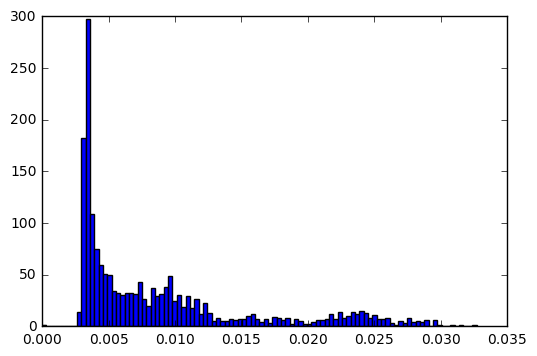

In [32]:
# Not Log scaled
_=plt.hist(np.squeeze(vltg_ftrs[12,4,:]),bins=100)

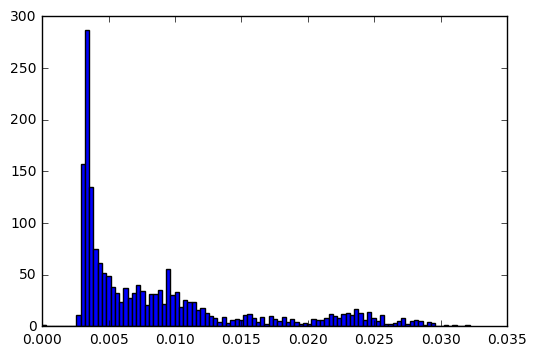

In [30]:
# Log scaled
_=plt.hist(np.squeeze(vltg_ftrs[12,4,:]),bins=100)

In [43]:
bro.shape

(5, 1860)

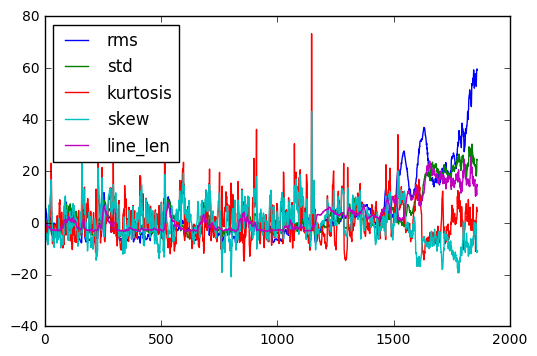

In [47]:
# db_pwr=np.squeeze(db_pwr)
bro=np.squeeze(vltg_ftrs[12,:,:])
for a in range(bro.shape[0]):
    _=plt.plot(bro[a,:].T,label=ftr_list[a])
_=plt.legend(loc='upper left')
# _=plt.plot(peri_ictal*20,'k-')
# _=plt.plot(db_pwr[0,:,:].T)
# db_pwr.shape

In [90]:
bro=np.squeeze(db_pwr)
bro.shape

(6, 3040)

In [ ]:
os.ex